In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#for better viewing
pd.set_option("display.max_columns",None)


In [20]:
df=pd.read_csv("sales.csv")
df.head()

,Date,Product,Units_Sold,Unit_Price
0,01-10-2025,A,10,50
1,02-10-2025,B,15,40
2,03-10-2025,C,8,60
3,04-10-2025,A,12,50


In [22]:
#check for missing values
print(df.isnull().sum())

#fill missing number with 0
df.fillna(0,inplace=True)

#convert 'Date' to datetime type if needed
df['Date'] = pd.to_datetime(df['Date'])

#check column types
df.info()

Date          0
Product       0
Units_Sold    0
Unit_Price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4 non-null      datetime64[ns]
 1   Product     4 non-null      object        
 2   Units_Sold  4 non-null      int64         
 3   Unit_Price  4 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 260.0+ bytes


In [23]:
df['Total_sales'] = np.multiply(df['Units_Sold'], df['Unit_Price'])
df.head()

,Date,Product,Units_Sold,Unit_Price,Total_sales
0,2025-01-10,A,10,50,500
1,2025-02-10,B,15,40,600
2,2025-03-10,C,8,60,480
3,2025-04-10,A,12,50,600


In [24]:
total_revenue = df['Total_sales'].sum()
avg_unit = df.groupby('Product')['Units_Sold'].mean()
top_product = df.groupby('Product')['Total_sales'].sum().idxmax()
print(f"💰 Total Revenue: {total_revenue}")
print("\n📦 average units sold per Product:\n", avg_unit)
print(f"\n🏆 Top selling Product: {top_product}")

💰 Total Revenue: 2180

📦 average units sold per Product:
 Product
A    11.0
B    15.0
C     8.0
Name: Units_Sold, dtype: float64

🏆 Top selling Product: A


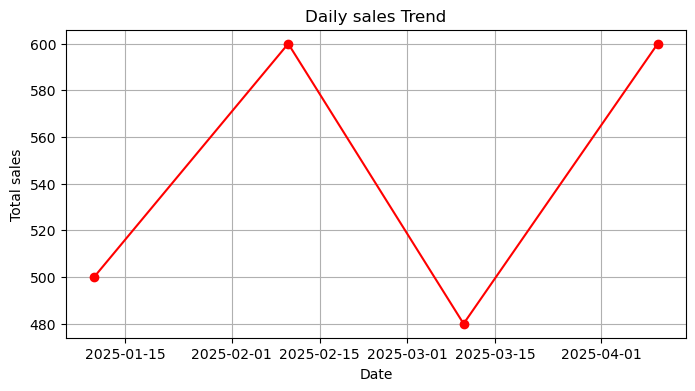

In [26]:
plt.figure(figsize=(8,4))
plt.plot(df['Date'],df['Total_sales'],marker='o',color='red' )
plt.title('Daily sales Trend')
plt.xlabel('Date')
plt.ylabel('Total sales')
plt.grid(True)
plt.show()


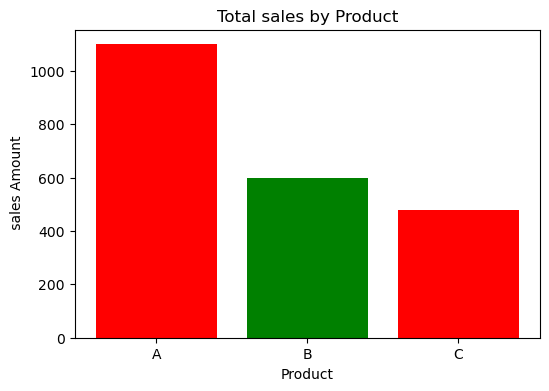

In [30]:
Product_sales=df.groupby('Product')['Total_sales'].sum()
plt.figure(figsize=(6,4))
plt.bar(Product_sales.index,Product_sales.values,color=['red','green','red'])
plt.title('Total sales by Product')
plt.xlabel('Product')
plt.ylabel(' sales Amount')
plt.show()